#### The original exercise was written by Shashank from NBI

#### This is just to show what I have learnt

#### This demonstrates the basic use of neural network by using torch
Here we're optimising the best fitting of a straight line to a set of data points

In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


# x_data and y_data are your data
x_data = torch.tensor([1.0,1.5, 2.0,2.5, 3.0])
y_data = torch.tensor([2.0, 3.0,4.0,5.0, 6.0])


# Define a simple linear model
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):                    # Define the computation performed at every call.
        y_pred = self.linear(x)
        return y_pred

    
# Our model
model = LinearModel()

# Define loss (Mean Square Error Loss)
criterion = torch.nn.MSELoss(reduction='sum')

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(300):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data.view(-1, 1))

    # Compute and print loss
    loss = criterion(y_pred, y_data.view(-1, 1))
    if(epoch%10 == 0):
        print(f'Epoch: {epoch} | Loss: {loss.item()}')

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 | Loss: 81.33187866210938
Epoch: 10 | Loss: 0.027000010013580322
Epoch: 20 | Loss: 0.02241043746471405
Epoch: 30 | Loss: 0.018610691651701927
Epoch: 40 | Loss: 0.015455315820872784
Epoch: 50 | Loss: 0.012834813445806503
Epoch: 60 | Loss: 0.01065866183489561
Epoch: 70 | Loss: 0.008851507678627968
Epoch: 80 | Loss: 0.00735075119882822
Epoch: 90 | Loss: 0.006104410160332918
Epoch: 100 | Loss: 0.005069413688033819
Epoch: 110 | Loss: 0.004209862090647221
Epoch: 120 | Loss: 0.0034961123019456863
Epoch: 130 | Loss: 0.002903323620557785
Epoch: 140 | Loss: 0.0024110625963658094
Epoch: 150 | Loss: 0.002002262743189931
Epoch: 160 | Loss: 0.0016627964796498418
Epoch: 170 | Loss: 0.0013808641815558076
Epoch: 180 | Loss: 0.001146744005382061
Epoch: 190 | Loss: 0.0009522956097498536
Epoch: 200 | Loss: 0.0007908319239504635
Epoch: 210 | Loss: 0.0006567498203366995
Epoch: 220 | Loss: 0.0005454116617329419
Epoch: 230 | Loss: 0.000452928536105901
Epoch: 240 | Loss: 0.0003761425905395299
Epoch: 2

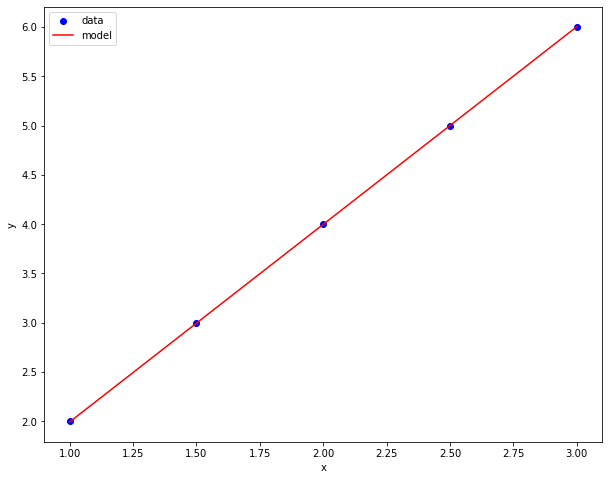

In [5]:
# Plotting
plt.figure(figsize=(10,8))
plt.scatter(x_data, y_data, color='blue',label="data")  # original data
plt.plot(x_data, model(x_data.view(-1, 1)).data.numpy(), color='red',label="model")  # fitted line
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.show()

## Regression of a function with a neural network in 1D

Example 2: Fitting a sine function

In [7]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Define the function you want to fit
def true_function(x):
    return torch.sin(x)


# Generate synthetic data
x = torch.linspace(-5, 5, 100)
y = true_function(x)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20) 
        
        self.fc2 = nn.Linear(20, 1) 

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # activation function
        x = self.fc2(x)              
        return x

    
# Create an instance of the neural network
net = Net()

# Define the loss function
criterion = nn.MSELoss()      # mean square

# Define the optimizer, where lr is learning rate
optimizer = optim.LBFGS(net.parameters(), lr=0.1) #lr=2 
                              # at high learning rate eg,10 we could get nan because it got lost

    
# Training loop
for i in range(100):
    def closure():
        optimizer.zero_grad()
        outputs = net(x.unsqueeze(-1))
        loss = criterion(outputs, y.unsqueeze(-1))
        loss.backward()
        return loss

    loss=optimizer.step(closure)
    if(i%10==0):
      print(i," ",loss.item())
    
# Print the final loss
with torch.no_grad():
    outputs = net(x.unsqueeze(-1))
    loss = criterion(outputs, y.unsqueeze(-1))
print(f'Final loss: {loss.item()}')

0   0.7324657440185547
10   8.118036203086376e-05
20   8.335953680216335e-06
30   3.0664541554870084e-06
40   1.1798746299973573e-06
50   1.1761566156565095e-06
60   1.1760084817069583e-06
70   1.1760084817069583e-06
80   1.1760084817069583e-06
90   1.1760084817069583e-06
Final loss: 1.1760084817069583e-06


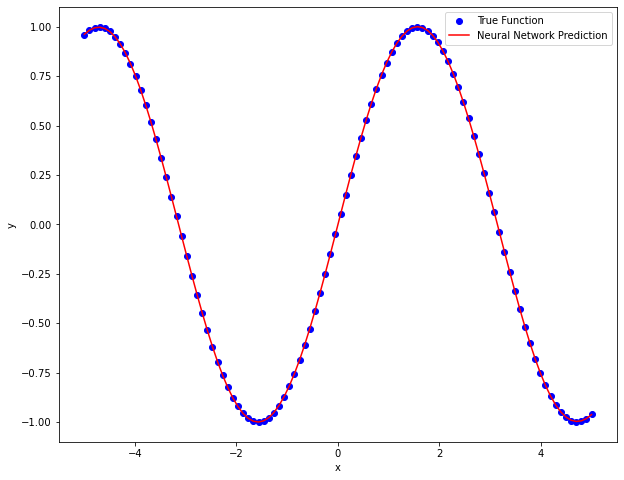

In [10]:
# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(x.numpy(), y.numpy(), label='True Function', color='blue')
plt.plot(x.numpy(), outputs.numpy(), label='Neural Network Prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Exercise 2:
Modify the code to solve the differential equation
$$
\frac{dy}{dx} = -y(x);\; y(0) = 1
$$
using finite difference method to calculate derivatives.
(alternatively, automatic differentiation to calculate derivatives. )

Add boundary conditions as another loss function.

In [13]:
# Define the function you want to fit
def true_function(x):
    return torch.exp(-x)    # y function


X = torch.linspace(0, 5, 100).reshape(-1,1)
Y = true_function(X)

In [14]:
# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20) # try 1,10  or 10,10
        self.fc2 = nn.Linear(20, 1) # try 10, 1

    def forward(self, x):
        x = torch.tanh(self.fc1(x)) # activation function
        x = self.fc2(x)             # can change to tanh self.fc2
        return x

# Create an instance of the neural network
net = Net()


# Define the loss function
def loss_func( y,y0,x ):                      
    loss1 = (y0-1)**2                         # boundary condition as a loss function
    dydx  = ( net(x+0.05) - net(x) )/0.05     # Finite diff funtion, where epsilon is 0.05
    loss2 = torch.mean((dydx + y)**2   )                  
    
    return loss1+loss2


# Define the optimizer
optimizer = optim.LBFGS(net.parameters(), lr=0.1)


# Training loop
for i in range(100):
    def closure():
        optimizer.zero_grad()
        outputs = net(X)
        #loss = criterion( outputs, y.unsqueeze(-1))   
        loss = loss_func( outputs,outputs[0],X)
        
        loss.backward()
        return loss
        
    loss = optimizer.step(closure)
    if(i%10==0):
      print(i," ",loss.item())
    
    
# Print the final loss
with torch.no_grad():
    outputs = net(X)
    loss = loss_func( outputs,outputs[0],X)        # modified
print(f'Final loss: {loss.item()}')


0   1.519936203956604
10   1.6330609469150659e-06
20   2.621552539494587e-07
30   2.615223024804436e-07
40   2.615223024804436e-07
50   2.615223024804436e-07
60   2.615223024804436e-07
70   2.615223024804436e-07
80   2.615223024804436e-07
90   2.615223024804436e-07
Final loss: 2.615223024804436e-07


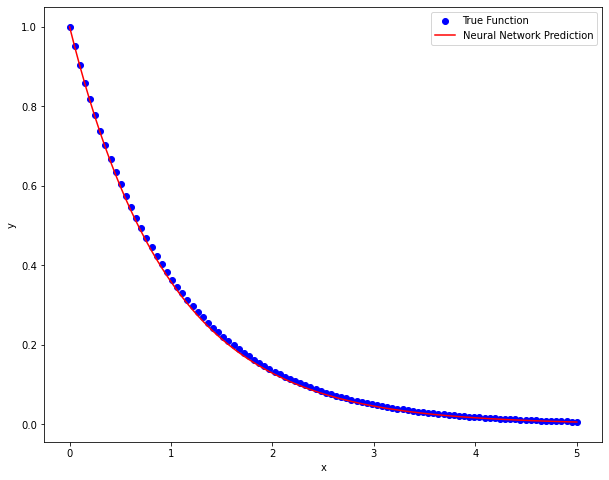

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(X.numpy(), Y.numpy(), label='True Function', color='blue')
plt.plot(X.numpy(), outputs.numpy(), label='Neural Network Prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Exercise 4:
Solve the differential equation
$$
\frac{dy}{dx} = -y\,(x-1);\; y(0) = 1
$$
Run the code twice to see whether the results are the same. The results for two successive runs may not be the same. Explain why this is the case.

#### Answer: 
The accumulation of rounding errors during computations can lead to small differences in results between runs. Or that the optimization algorithm utilises random sampling of data points or random noise injection. These factors could cause successive runs to produce slightly different results.

In [55]:
def true_function2(x):
    return np.exp(-0.5*x**2 + x)


X = torch.linspace(0, 5, 100).reshape(-1,1)
Y = true_function2(X)

def loss_func4(  x,y_epsilon,y0,y ):                  
    loss = (y0-1)**2 
    dydx = ( y_epsilon - y )/0.05           
    loss2 = torch.mean((dydx + y*(x-1))**2   )                  
    
    return loss+loss2


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20) 
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x)) # activation function
        x = self.fc2(x)            
        return x

# Create an instance of the neural network
net = Net()

optimizer = optim.LBFGS(net.parameters(), lr=0.1)

for i in range(100):
    def closure():
        optimizer.zero_grad()
        outputs = net(X)                #outputs[0] is when X=0
        loss = loss_func4( X,net(X+0.05),outputs[0],outputs )
        
        loss.backward()
        return loss
        
    loss = optimizer.step(closure)
    if(i%10==0):
        print(i," ",loss.item())
    
    
# Print the final loss
with torch.no_grad():
    outputs = net(X)
    loss = loss_func4( X,net(X+0.05),outputs[0],outputs )        # modified
print(f'Final loss: {loss.item()}')


0   1.2808332443237305
10   5.4167503549251705e-05
20   3.068586011067964e-05
30   1.0723795639933087e-05
40   7.575461950182216e-06
50   7.562373411929002e-06
60   7.557898243248928e-06
70   7.551795988547383e-06
80   7.54626944399206e-06
90   7.543743322457885e-06
Final loss: 7.541070317529375e-06


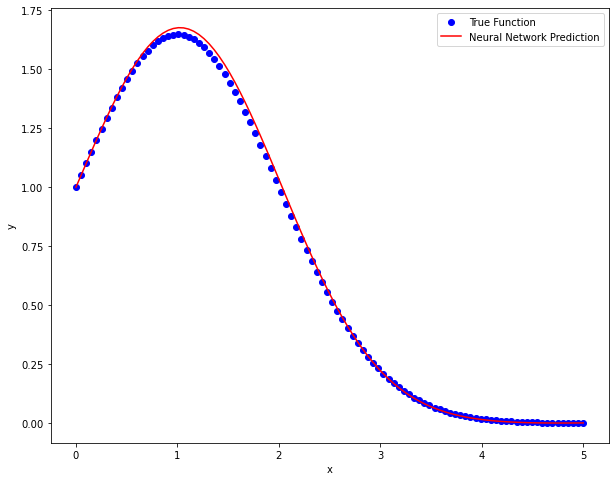

In [56]:
# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X.numpy(), Y.numpy(), label='True Function', color='blue')
plt.plot(X.numpy(), outputs.numpy(), label='Neural Network Prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Exercise 5: 2d regression LBFGS
Fitting NN to this 2d function:

$$ 
z = \sin { (\sqrt{(x ^ 2 + y ^ 2)} ) } 
$$


In [57]:
# Define the true function and generate some data
def true_func(x, y):
    return torch.sin(torch.sqrt(x ** 2 + y ** 2))

# Create a grid of points
x = torch.linspace(-3, 3, 100)
y = torch.linspace(-3, 3, 100)
xx, yy = torch.meshgrid(x, y)
zz_true = true_func(xx, yy)

# Add some noise
zz = zz_true

# Convert to PyTorch tensors
input_data = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), 1)
target_data = zz.reshape(-1, 1)

# Define the neural network
model = nn.Sequential(
    nn.Linear(2, 100),
    nn.ReLU(),
    nn.Linear(100, 1),
)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.1)

# Define a closure function for re-evaluation
def closure():
    optimizer.zero_grad()
    prediction = model(input_data)
    loss = criterion(prediction, target_data)
    loss.backward()
    return loss

# Train the neural network
for t in range(1000):
    loss=optimizer.step(closure)
    if(t%100==0):
        print(t," ",loss.item())

/Users/kam/opt/anaconda3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0   0.6505774855613708
100   0.00010091075819218531
200   0.00010089568240800872
300   0.0001008934632409364
400   0.0001008934632409364
500   0.0001008934632409364
600   0.0001008934632409364
700   0.0001008934632409364
800   0.0001008934632409364
900   0.0001008934632409364


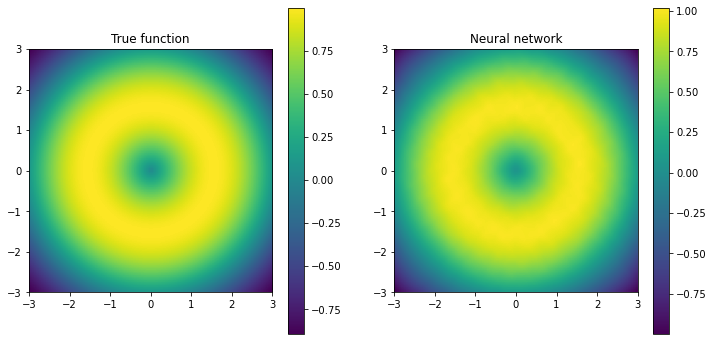

In [58]:
# Predict the function values at the grid points
with torch.no_grad():
    zz_pred = model(input_data).view_as(zz)

# Plot the true function and the neural network's approximation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

c = axs[0].imshow(zz, origin='lower', extent=(-3, 3, -3, 3), cmap='viridis')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('True function')

c = axs[1].imshow(zz_pred, origin='lower', extent=(-3, 3, -3, 3), cmap='viridis')
fig.colorbar(c, ax=axs[1])
axs[1].set_title('Neural network')

plt.show()

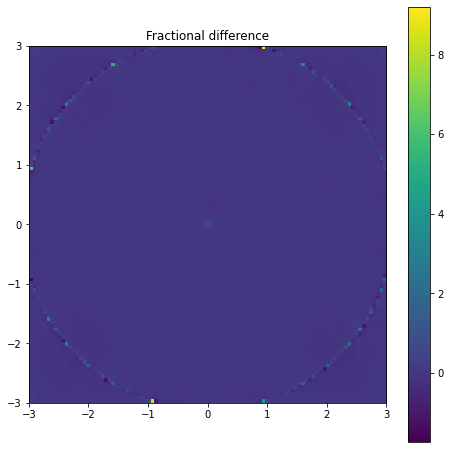

In [67]:
# This shows the difference between true function amd neural network

diff = (zz_pred-zz)/zz
plt.figure(figsize=(8,8))
plt.title('Fractional difference')
plt.imshow(diff, origin='lower', extent=(-3, 3, -3, 3), cmap='viridis')
plt.colorbar()
plt.show()

_____
#### I skipped this one abd put it at the end here as there was an error to my solution.
### Exercise 3:
Solve the same differential equation using
$$
y = 1+x\,\mathrm{Net}(x)
$$
Where $\,\mathrm{Net}(x)$ refers to the Neural network function 

This way we do not need to add another loss function.


In [47]:
X = torch.linspace(0, 5, 100).reshape(-1,1)
Y = true_function(X)
Ep = 0.5
def loss_func3(  x,y_epsilon,y ):              
    sol  = 1 + x*y                          # !! Here sol stands for solution, and y is from neural network            
    dydx = ( y_epsilon - y )/Ep           #  Finite difference method; epsilon = 0.5
    loss = torch.mean((dydx + sol)**2 )                  
    
    return loss


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20) 
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))        # activation function
        x = self.fc2(x)            
        return x

    
# Create an instance of the neural network
net = Net()

optimizer = optim.LBFGS(net.parameters(), lr=0.1)

for i in range(100):
    def closure():
        optimizer.zero_grad()
        outputs = net(X)  
   
        loss = loss_func3( X,net(X+Ep),outputs )

        loss.backward()
        return loss
        
    loss = optimizer.step(closure)
    if(i%10==0):
      print(i," ",loss.item())
    
    
# Print the final loss
with torch.no_grad():
    outputs = net(X)
    loss = loss_func3( X,net(X+Ep),outputs )        # modified
print(f'Final loss: {loss.item()}')


0   2.2125306129455566
10   0.00022197386715561152
20   1.2563144991872832e-05
30   3.416349727558554e-06
40   3.3698770494083874e-06
50   3.3690430427668616e-06
60   3.3690430427668616e-06
70   3.3690430427668616e-06
80   3.3690430427668616e-06
90   3.3690430427668616e-06
Final loss: 3.3690430427668616e-06


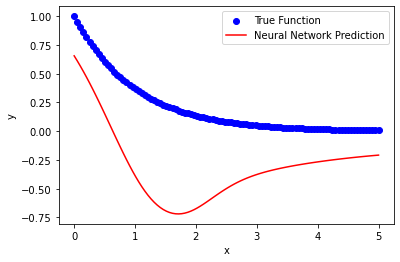

In [48]:
# Plot the results
plt.scatter(X.numpy(), Y.numpy(), label='True Function', color='blue')
plt.plot(X.numpy(), outputs.numpy(), label='Neural Network Prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()